## Imports

In [43]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## 1. Dataset overwiev

Quick information to understand the size, structure, and data types of the dataset.

In [123]:
# Shape 
print('Dataset shape (rows, columns)', df.shape)

# Column names
print('\nColumn names:')
print(df.columns.tolist())

# Data Types
print('\nData Types:')
print(df.dtypes)

# Dataset Summary
print('\n Dataset Information:')
print(df.info())


Dataset shape (rows, columns) (7043, 21)

Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 Dat

In [44]:
# Read CSV-File and explore the Dataset
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
# Descriptive statistics for numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [39]:
# Descriptive statistics for categorical features
print('\nDescribe with object:')
df.describe(include='object')


Describe with object:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [56]:
# Missing Count + Missing %

missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = (
    pd.DataFrame({
        'missing_count' : missing_count,
        'missing_percent' : missing_percent
    })
    .query('missing_count > 0')
    .sort_values('missing_percent', ascending=False)
)

missing_df

,missing_count,missing_percent


## 2. Target Variable: Churn

Total number of customers without churn: 5174
Percentage: 73.46%
Total number of customers with churn: 1869
Percentage: 26.54%


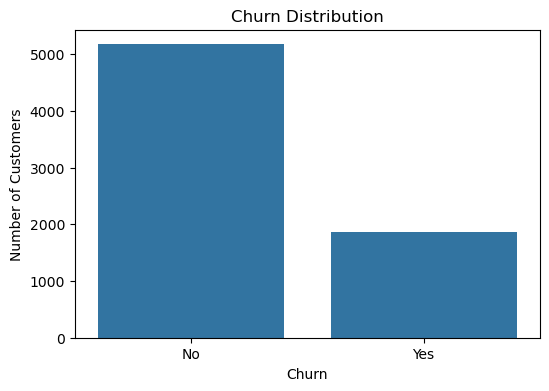

In [128]:
# Clients without Churn
churn_no = df[df['Churn'] == 'No']
percent_churn_no = (len(churn_no) / len(df)) * 100
print('Total number of customers without churn:', len(churn_no))
print(f'Percentage: {percent_churn_no:.2f}%')

# Client with Churn
churn_yes = df[df['Churn'] == 'Yes']
percent_churn_yes = (len(churn_yes) / len(df)) * 100
print('Total number of customers with churn:', len(churn_yes))
print(f'Percentage: {percent_churn_yes:.2f}%')

# Visualisation of Churn behaviors
# Count values
churn_counts = df['Churn'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)

plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

plt.show()



**The graph shows that a majority of the customers have not had a Churn.**

## 3. Churn vs. Numerical features
Goal: Understand if exists a systematic difference between numerical features and customers with and without Churn

### 3.1 Feature: MonthlyCharges

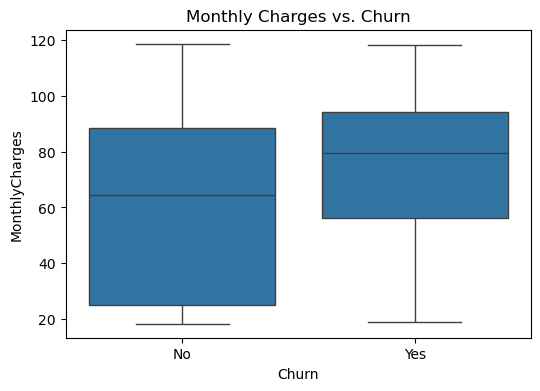

In [129]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')
plt.show()


**Observation:**  
Customers who churn tend to have higher monthly charges, as indicated by a higher median.

### 3.2 Feature: TotalCharges

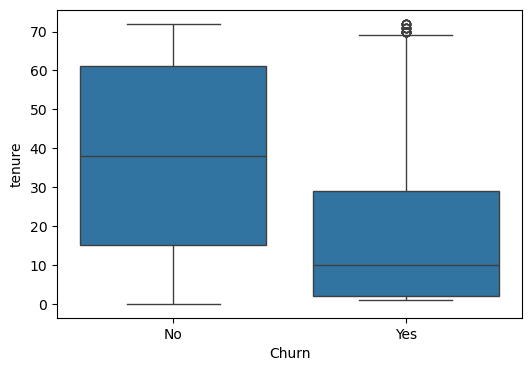

In [139]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

**Observation:**
Customers who churn tend to tenure few time

## 4. Churn vs. Categorical Features

### 4.1 Feature: Contract

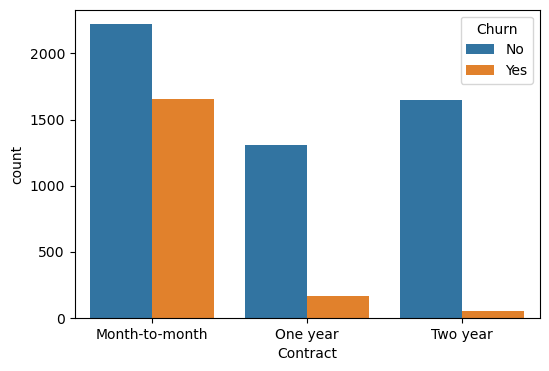

In [146]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

**Observation:**
Customers who have a Month-to-month Contract tend to churn more that customers who have a One year Contract or Two year contract

### 4.2 Feature: TechSupport

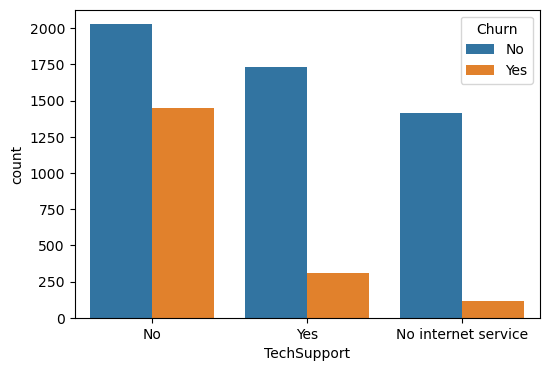

In [150]:
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.show()

**Observation:**
Customers who have not technical support could tend to churn more than customers who have technical support 

### 4.3 Feature: Partner 

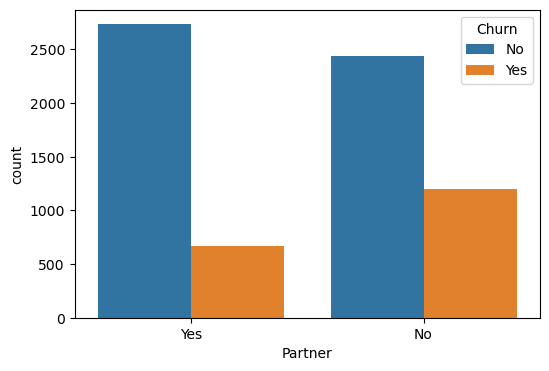

In [151]:
plt.figure(figsize=(6,4))
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()

**Observation:**
That a customer has or has not a partner does not have a impact in churn.



## EDA Summary und Key Insights

### Key Findings

- Customer churn is imbalanced, with fewer customers churning than staying.
- Customers with higher monthly charges tend to churn more frequently.
- Shorter tenure is strongly associated with higher churn.
- Month-to-month contracts show significantly higher churn compared to long-term contracts.
- Certain service and payment categories concentrate a higher proportion of churn.

### Data Quality Notes

- `TotalCharges` is derived from `tenure` and `MonthlyCharges` and may introduce redundancy.
- Some numerical features require type validation before modeling.

### Next Steps

- Encode categorical variables.
- Scale numerical features if needed.
- Prepare data for machine learning models.
